<a href="https://colab.research.google.com/github/RexGod/DataMining_Pgu_Nueral_Network/blob/main/finalDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [3]:
pathImages = '/content/drive/MyDrive/tits_pic'

In [4]:
pathManual = '/content/drive/MyDrive/Radiology_manual_annotations.xlsx'
manualRadio = pd.read_excel(pathManual)

In [5]:
manualRadio= manualRadio.rename(columns={'Pathology Classification/ Follow up':'classification'})

In [6]:
manualRadio = manualRadio[manualRadio['Type']=='CESM']

In [7]:
import os
images = os.listdir(pathImages)
loaded_images = []
#filename_txt = []
for filename in images:
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_list = os.path.join(pathImages, filename)
        loaded_images.append(image_list)
        #filename_txt.append(filename)

In [8]:
loaded_images = sorted(loaded_images, key=lambda x: x.lower())

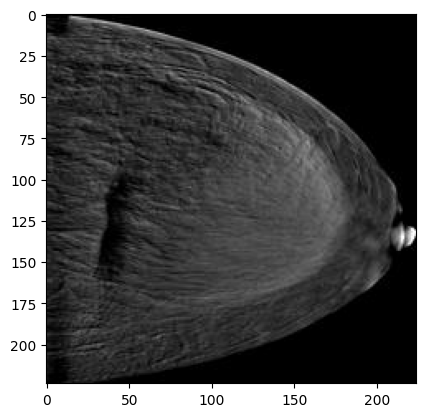

In [9]:
img1 = plt.imread(loaded_images[0])
plt.imshow(img1)

In [10]:
loaded_image = []
for image_path in loaded_images:
    image = plt.imread(image_path)
    loaded_image.append(image)

In [11]:
manualRadio = manualRadio.sort_values(by=['Image_name'])

In [12]:
manualRadio.head()

,Image_name,Patient_ID,Side,Type,Age,Breast density (ACR),BIRADS,Findings,View,Tags,Machine,classification
556,P100_L_CM_CC,100,L,CESM,61,_,2,Non enhancement,CC,postoperative,1,Benign
557,P100_L_CM_MLO,100,L,CESM,61,_,2,Non enhancement,MLO,postoperative,1,Benign
552,P100_R_CM_CC,100,R,CESM,61,_,1,No mass or non mass enhancement,CC,normal,1,Normal
553,P100_R_CM_MLO,100,R,CESM,61,_,1,No mass or non mass enhancement,MLO,normal,1,Normal
564,P101_L_CM_CC,101,L,CESM,47,_,1,No mass or non mass enhancement,CC,normal,1,Normal


In [13]:
validation_data_size = int(len(loaded_image)*0.12)
test_data_size = int(len(loaded_image)*0.13)

In [14]:
random_select = np.random.choice(len(loaded_image), size=validation_data_size, replace=False)

In [15]:
print(random_select)

[ 427   63   51  783   60  503  511  768  739   99  502  153  691   76
  986  868   41  673  106  889  600   33  245  490    8  856  300   20
  286  774  415  590    7  183  772  528  161  186  135  321  934  946
  301    6   42  900  119  742  947  344  374  997  567  478   57  492
   61  579  395  613  845  773  458  618  292   66  930  880  533 1002
  677  922   91  943  727  243  379  389  861  909  863  173  488  832
  812  291  883  686  726  635  332  512  857   45  348  167  817  166
  472  658  497  840  737  902  585  336  807  564  298  212  416  867
  532  973  894  897  367  892  422  647]


In [16]:
validation_data_x = np.array(loaded_image)[random_select]
validation_data_y = manualRadio.iloc[random_select]
loaded_image = np.delete(loaded_image, random_select, axis=0)
manualRadio=manualRadio.drop(manualRadio.index[random_select])

In [17]:
random_select = np.random.choice(len(loaded_image), size=test_data_size, replace=False)

In [18]:
test_data_x = np.array(loaded_image)[random_select]
test_data_y = manualRadio.iloc[random_select]
loaded_image = np.delete(loaded_image, random_select, axis=0)
manualRadio=manualRadio.drop(manualRadio.index[random_select])

In [19]:
train_data_x = np.array(loaded_image)
train_data_y = manualRadio[["Image_name" , "classification"]]

In [20]:
import tensorflow as tf
import keras

In [21]:
manualRadio.head()

,Image_name,Patient_ID,Side,Type,Age,Breast density (ACR),BIRADS,Findings,View,Tags,Machine,classification
556,P100_L_CM_CC,100,L,CESM,61,_,2,Non enhancement,CC,postoperative,1,Benign
557,P100_L_CM_MLO,100,L,CESM,61,_,2,Non enhancement,MLO,postoperative,1,Benign
552,P100_R_CM_CC,100,R,CESM,61,_,1,No mass or non mass enhancement,CC,normal,1,Normal
553,P100_R_CM_MLO,100,R,CESM,61,_,1,No mass or non mass enhancement,MLO,normal,1,Normal
564,P101_L_CM_CC,101,L,CESM,47,_,1,No mass or non mass enhancement,CC,normal,1,Normal


In [22]:
label_mapping = {'Benign': 0, 'Normal': 1, 'Malignant': 2}

In [23]:
integer_labels = train_data_y['classification'].map(label_mapping)
integer_labels_valid = validation_data_y['classification'].map(label_mapping)
y_train_to_categorical = keras.utils.to_categorical(integer_labels, num_classes=len(label_mapping), dtype='float32')
y_validation_to_categorical = keras.utils.to_categorical(integer_labels_valid, num_classes=len(label_mapping), dtype='float32')

In [24]:
from tensorflow.keras.applications.resnet import ResNet101,ResNet152 , preprocess_input , decode_predictions

In [25]:
#train_images_rgb = np.repeat(train_data_x[..., np.newaxis], 3, -1)[..., 0]
#test_images_rgb = np.repeat(test_data_x[..., np.newaxis], 3, -1)
#validation_images_rgb = np.repeat(validation_data_x[..., np.newaxis], 3, -1)[..., 0]


In [26]:
train_data_x = train_data_x/255
validation_data_x = validation_data_x/255

In [27]:
base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

234698864/234698864 [==============================] - 13s 0us/step


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D , Conv2D , Flatten , Dropout , MaxPooling2D , BatchNormalization
from keras import layers
from tensorflow.keras.optimizers import Adam,Adamax,SGD


In [46]:
model = Sequential()

In [47]:
model.add(base_model)

In [48]:
for layer in base_model.layers:
    layer.trainable = True

for layer in base_model.layers[:-7]:
    layer.trainable = False

In [49]:
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate the image by a random angle between -20 and 20 degrees
    width_shift_range=0.1,  # Shift the image horizontally by a fraction of its width
    height_shift_range=0.1,  # Shift the image vertically by a fraction of its height
    shear_range=0.2,  # Apply shear transformation
    zoom_range=0.2,  # Apply zoom transformation
    horizontal_flip=True,  # Flip the image horizontally
    vertical_flip=False,  # Do not flip the image vertically
    fill_mode='nearest'  # Fill any empty pixels created during the augmentation process
)

In [51]:
train_generator = datagen.flow(train_data_x, y_train_to_categorical, batch_size=32)

In [52]:
model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy' , 'AUC' ])

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True ,)

In [55]:
nemudar = model.fit(train_generator,
                    validation_data=(validation_data_x,y_validation_to_categorical ),
                    epochs=50,
                    callbacks = [early_stopping]
                    )


Epoch 1/50
24/24 [==============================] - 28s 654ms/step - loss: 1.4150 - accuracy: 0.3891 - auc: 0.5671 - val_loss: 1.7490 - val_accuracy: 0.2417 - val_auc: 0.4788
Epoch 2/50
24/24 [==============================] - 12s 489ms/step - loss: 1.3902 - accuracy: 0.4090 - auc: 0.5818 - val_loss: 1.1118 - val_accuracy: 0.4083 - val_auc: 0.5662
Epoch 3/50
24/24 [==============================] - 11s 476ms/step - loss: 1.3018 - accuracy: 0.4117 - auc: 0.5950 - val_loss: 1.0614 - val_accuracy: 0.4000 - val_auc: 0.5856
Epoch 4/50
24/24 [==============================] - 12s 482ms/step - loss: 1.2043 - accuracy: 0.4422 - auc: 0.6320 - val_loss: 1.0212 - val_accuracy: 0.4833 - val_auc: 0.6756
Epoch 5/50
24/24 [==============================] - 11s 465ms/step - loss: 1.2274 - accuracy: 0.4343 - auc: 0.6120 - val_loss: 1.0355 - val_accuracy: 0.4750 - val_auc: 0.6556
Epoch 6/50
24/24 [==============================] - 11s 461ms/step - loss: 1.2574 - accuracy: 0.4329 - auc: 0.6003 - val_loss

Text(0.5, 1.0, 'val_loss')

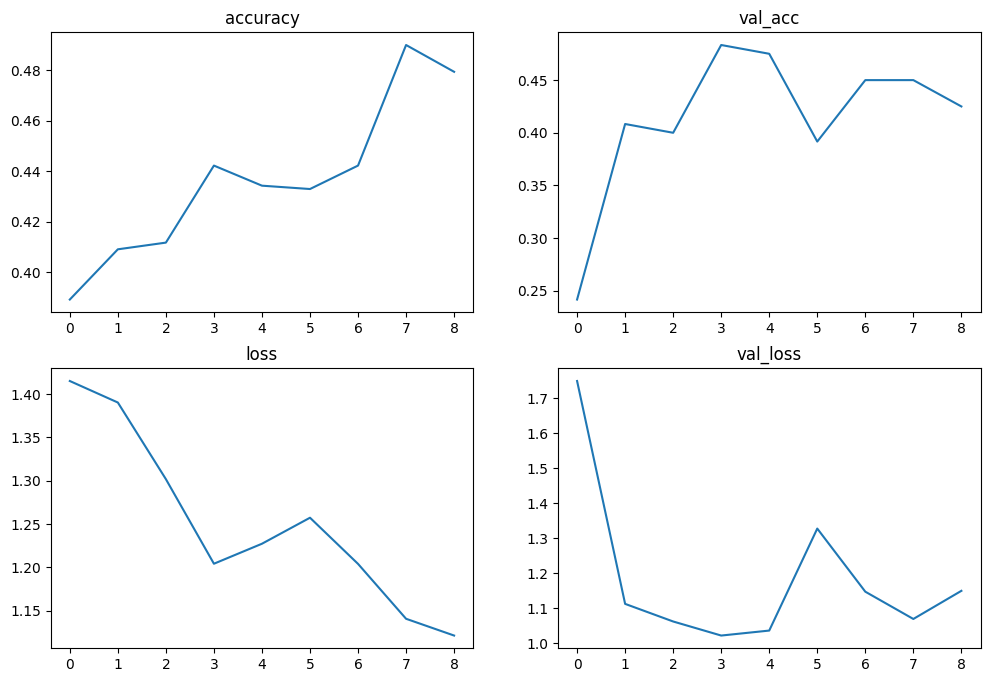

In [56]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
plt.plot(nemudar.history['accuracy'])
plt.title('accuracy')
plt.subplot(2,2,2)
plt.plot(nemudar.history['val_accuracy'])
plt.title('val_acc')
plt.subplot(2,2,3)
plt.plot(nemudar.history['loss'])
plt.title('loss')
plt.subplot(2,2,4)
plt.plot(nemudar.history['val_loss'])
plt.title('val_loss')

In [57]:
#model.save('/content/drive/MyDrive/ResNet152new.h5')

In [62]:
Resmodel = tf.keras.models.load_model('/content/drive/MyDrive/ResNet152new.h5')

In [63]:
test_data_x = test_data_x/255

In [64]:
integer_labels_test = test_data_y['classification'].map(label_mapping)
y_test_to_categorical = keras.utils.to_categorical(integer_labels_test, num_classes=len(label_mapping), dtype='float32')

In [70]:
Resmodel.evaluate(test_data_x,y_test_to_categorical )

5/5 [==============================] - 1s 176ms/step - loss: 1.1475 - accuracy: 0.3846 - auc: 0.5192


[1.1475260257720947, 0.38461539149284363, 0.5192307829856873]